# German Credit Dataset <br>

ㅇData Source : https://www.openml.org/d/31 
<br>
1. Title: German Credit data<br>
<br>
2. Number of Instances: 1000<br>
<br>

3. Number of features: 20<br>
<br>
4. Target : Good / Bad<br>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib as mpl
import re
from collections import Counter
from nltk.tag import pos_tag
import seaborn as sns
import nltk
import arff
from scipy.io import arff

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

RANDOM_SEED = 2

%matplotlib inline

In [2]:

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier


In [121]:

def load_german_data():
    
    data= arff.loadarff('./data/dataset_31_credit-g.arff')
    df = pd.DataFrame(data[0])
    
    col_names = list(df.isnull().sum().index)
        
    # Change Binary Category to 1 or 0
    
    # Good : 1, Bad : 0
    df_dummy = pd.get_dummies(df['class'])
    df['class'] = df_dummy.iloc[:,1]
    
    # Yes : 1, No : 0
    df_dummy = pd.get_dummies(df['own_telephone'])
    df['own_telephone'] = df_dummy.iloc[:,1]
    
    # Foreign Yes: 1, No : 0
    df_dummy = pd.get_dummies(df['foreign_worker'])
    df['foreign_worker'] = df_dummy.iloc[:,1]
    
    # Num Depden 1 : 0, 2 : 1
    df_dummy = pd.get_dummies(df['num_dependents'])
    df['num_dependents'] = df_dummy.iloc[:,1]
    
    df['installment_commitment'] = df['installment_commitment'].astype(object)
    df['residence_since'] = df['residence_since'].astype(object)
    df['existing_credits'] = df['existing_credits'].astype(object)

    return df, col_names
df, col_names = load_german_data()
df.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,"b""'<0'""",6.0,"b""'critical/other existing credit'""",b'radio/tv',1169.0,"b""'no known savings'""","b""'>=7'""",4,"b""'male single'""",b'none',4,"b""'real estate'""",67.0,b'none',b'own',2,b'skilled',0,1,1,1
1,"b""'0<=X<200'""",48.0,"b""'existing paid'""",b'radio/tv',5951.0,"b""'<100'""","b""'1<=X<4'""",2,"b""'female div/dep/mar'""",b'none',2,"b""'real estate'""",22.0,b'none',b'own',1,b'skilled',0,0,1,0
2,"b""'no checking'""",12.0,"b""'critical/other existing credit'""",b'education',2096.0,"b""'<100'""","b""'4<=X<7'""",2,"b""'male single'""",b'none',3,"b""'real estate'""",49.0,b'none',b'own',1,"b""'unskilled resident'""",1,0,1,1
3,"b""'<0'""",42.0,"b""'existing paid'""",b'furniture/equipment',7882.0,"b""'<100'""","b""'4<=X<7'""",2,"b""'male single'""",b'guarantor',4,"b""'life insurance'""",45.0,b'none',"b""'for free'""",1,b'skilled',1,0,1,1
4,"b""'<0'""",24.0,"b""'delayed previously'""","b""'new car'""",4870.0,"b""'<100'""","b""'1<=X<4'""",3,"b""'male single'""",b'none',4,"b""'no known property'""",53.0,b'none',"b""'for free'""",2,b'skilled',1,0,1,0
5,"b""'no checking'""",36.0,"b""'existing paid'""",b'education',9055.0,"b""'no known savings'""","b""'1<=X<4'""",2,"b""'male single'""",b'none',4,"b""'no known property'""",35.0,b'none',"b""'for free'""",1,"b""'unskilled resident'""",1,1,1,1
6,"b""'no checking'""",24.0,"b""'existing paid'""",b'furniture/equipment',2835.0,"b""'500<=X<1000'""","b""'>=7'""",3,"b""'male single'""",b'none',4,"b""'life insurance'""",53.0,b'none',b'own',1,b'skilled',0,0,1,1
7,"b""'0<=X<200'""",36.0,"b""'existing paid'""","b""'used car'""",6948.0,"b""'<100'""","b""'1<=X<4'""",2,"b""'male single'""",b'none',2,b'car',35.0,b'none',b'rent',1,"b""'high qualif/self emp/mgmt'""",0,1,1,1
8,"b""'no checking'""",12.0,"b""'existing paid'""",b'radio/tv',3059.0,"b""'>=1000'""","b""'4<=X<7'""",2,"b""'male div/sep'""",b'none',4,"b""'real estate'""",61.0,b'none',b'own',1,"b""'unskilled resident'""",0,0,1,1
9,"b""'0<=X<200'""",30.0,"b""'critical/other existing credit'""","b""'new car'""",5234.0,"b""'<100'""",b'unemployed',4,"b""'male mar/wid'""",b'none',2,b'car',28.0,b'none',b'own',2,"b""'high qualif/self emp/mgmt'""",0,0,1,0


In [122]:
df.describe()

,duration,credit_amount,age,num_dependents,own_telephone,foreign_worker,class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,35.546000,0.155000,0.404000,0.963000,0.700000
std,12.058814,2822.736876,11.375469,0.362086,0.490943,0.188856,0.458487
min,4.000000,250.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1365.500000,27.000000,0.000000,0.000000,1.000000,0.000000
50%,18.000000,2319.500000,33.000000,0.000000,0.000000,1.000000,1.000000
75%,24.000000,3972.250000,42.000000,0.000000,1.000000,1.000000,1.000000
max,72.000000,18424.000000,75.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
for col in col_names:
    print (col, ":", len(df[col].unique()))

checking_status : 4
duration : 33
credit_history : 5
purpose : 10
credit_amount : 921
savings_status : 5
employment : 5
installment_commitment : 4
personal_status : 4
other_parties : 3
residence_since : 4
property_magnitude : 4
age : 53
other_payment_plans : 3
housing : 3
existing_credits : 4
job : 4
num_dependents : 2
own_telephone : 2
foreign_worker : 2
class : 2


In [118]:
df.dtypes

checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment     object
personal_status            object
other_parties              object
residence_since            object
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits           object
job                        object
num_dependents              uint8
own_telephone               uint8
foreign_worker              uint8
class                       uint8
dtype: object

In [68]:
def display_barplot(df, col_name):
    sns.factorplot(col_name,'class', data=df,size=4,aspect=3)
    print (df.pivot_table('own_telephone', index=[col_name,'class'] , aggfunc='count'))
    
def numerical_barplot(df, col_name):
    fig, axis1 = plt.subplots(1,1,figsize=(18,4))
    average_col = df[[col_name, "class"]].groupby([col_name],as_index=False).mean()
    sns.barplot(x=col_name, y='class', data=average_col)
    

In [69]:
def stack_barplot(df, col_name):
    """
    tacked_bar_data["total"] = stacked_bar_data.Series1 + stacked_bar_data.Series2

    #Set general plot properties
    sns.set_style("white")
    sns.set_context({"figure.figsize": (24, 10)})

    #Plot 1 - background - "total" (top) series
    sns.barplot(x = stacked_bar_data.Group, y = stacked_bar_data.total, color = "red")

    #Plot 2 - overlay - "bottom" series
    bottom_plot = sns.barplot(x = stacked_bar_data.Group, y = stacked_bar_data.Series1, color = "#0000A3")


    topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
    bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
    l = plt.legend([bottombar, topbar], ['Bottom Bar', 'Top Bar'], loc=1, ncol = 2, prop={'size':16})
    l.draw_frame(False)

    #Optional code - Make plot look nicer
    sns.despine(left=True)
    bottom_plot.set_ylabel("Y-axis label")
    bottom_plot.set_xlabel("X-axis label")

    #Set fonts to consistent 16pt size
    for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
                 bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
        item.set_fontsize(16)
    """   
    good_class = df[df['class']==1][col_name].value_counts()
    bad_class = df[df['class']==0][col_name].value_counts()
    df_plot = pd.DataFrame([good_class,bad_class])
    df_plot.index = ['Good','Bad']
    df_plot.plot(kind='bar',stacked=True, figsize=(13,8))
    


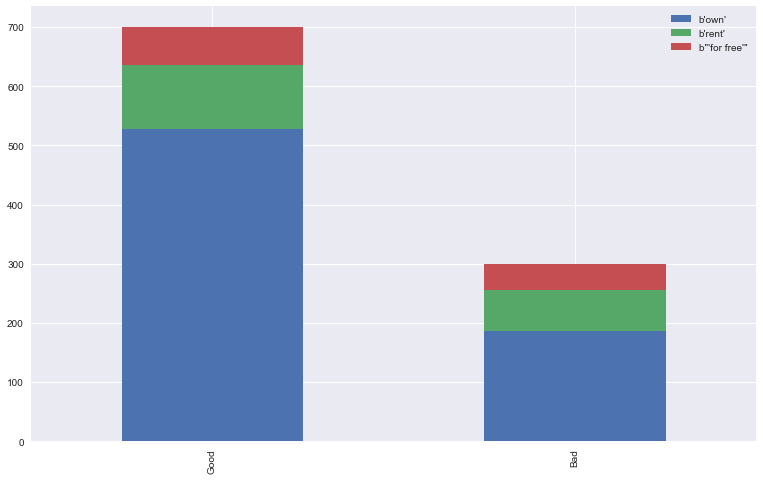

In [11]:
stack_barplot(df, 'housing')

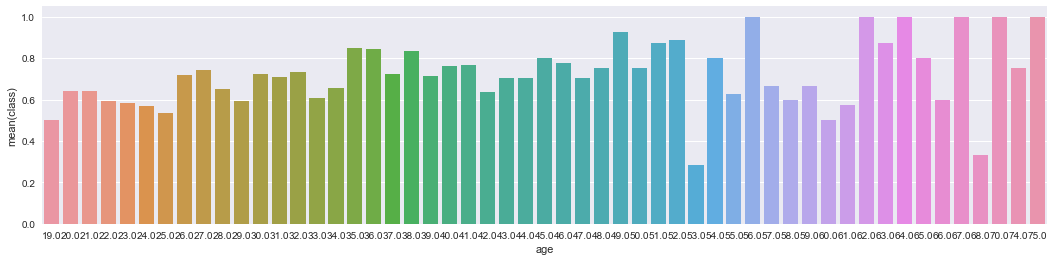

In [12]:
numerical_barplot(df, 'age')

credit_history  class
0               0         28
                1         21
1               0         50
                1        243
2               0         28
                1         60
3               0        169
                1        361
4               0         25
                1         15
Name: own_telephone, dtype: int64


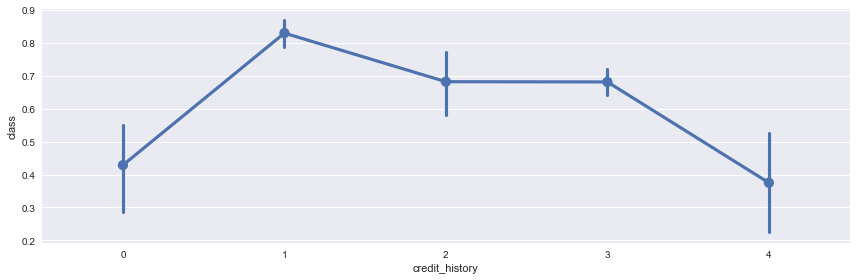

In [25]:
display_barplot(df, 'credit_history')


'credit_history' seems to have relationship to class as intuition.

purpose  class
0        0          4
         1          8
1        0         89
         1        145
2        0         17
         1         86
3        0         34
         1         63
4        0         22
         1         28
5        0         58
         1        123
6        0          5
         1          7
7        0         62
         1        218
8        0          8
         1         14
9        0          1
         1          8
Name: own_telephone, dtype: int64


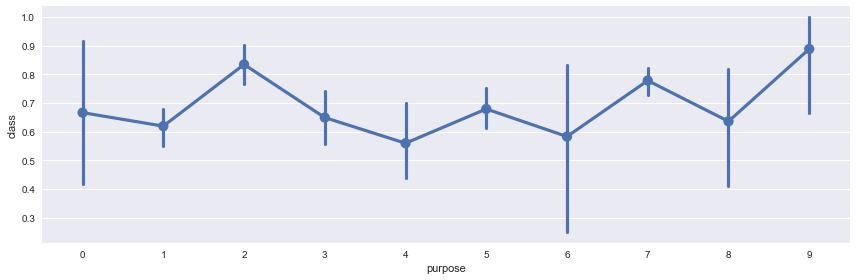

In [26]:
display_barplot(df, 'purpose')


Drop 'purpose'

checking_status   class
b"'0<=X<200'"     0        105
                  1        164
b"'<0'"           0        135
                  1        139
b"'>=200'"        0         14
                  1         49
b"'no checking'"  0         46
                  1        348
Name: own_telephone, dtype: int64


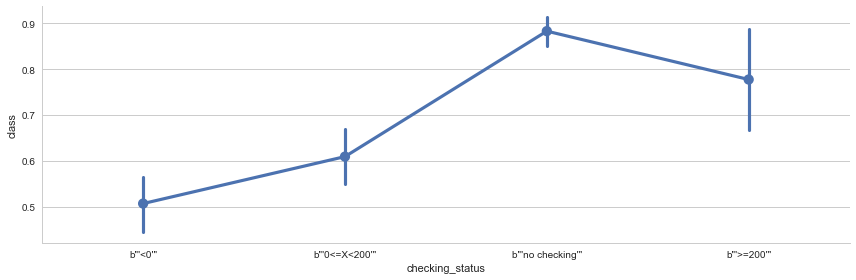

In [126]:
display_barplot(df, 'checking_status')

'checking_status' has some what relationship whit class<Br>
but I don't know why the 'No cheking' has the highest class mean 

savings_status  class
0               0         34
                1         69
1               0         11
                1         52
2               0        217
                1        386
3               0          6
                1         42
4               0         32
                1        151
Name: own_telephone, dtype: int64


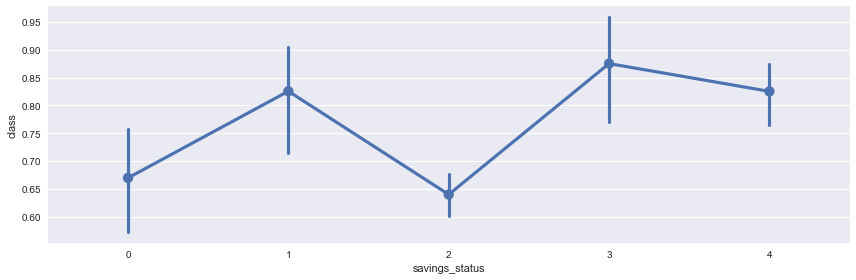

In [28]:
display_barplot(df, 'savings_status')

'savings_status' has some what relationship whit class as intuition<br>
but I don't know why the 'None saving' has the highest class mean

employment  class
0           0        104
            1        235
1           0         39
            1        135
2           0         70
            1        102
3           0         64
            1        189
4           0         23
            1         39
Name: own_telephone, dtype: int64


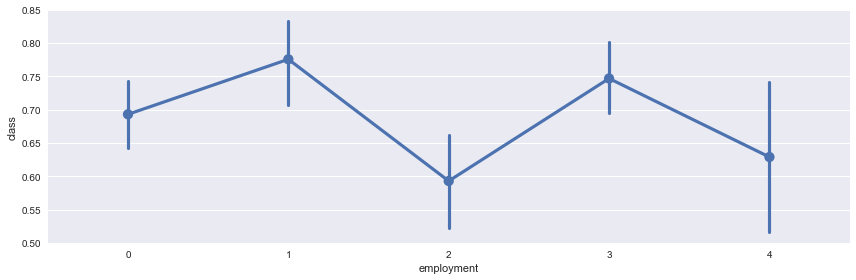

In [29]:
display_barplot(df, 'employment')

installment_commitment  class
1.0                     0         34
                        1        102
2.0                     0         62
                        1        169
3.0                     0         45
                        1        112
4.0                     0        159
                        1        317
Name: own_telephone, dtype: int64


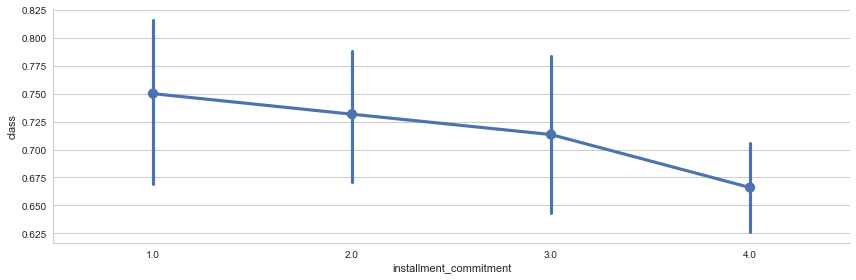

In [123]:
display_barplot(df, 'installment_commitment')

From the data statement : https://www.openml.org/d/31 <br>
Attribute 8: (numerical) <br>
Installment rate in percentage of disposable income<br>
I don't understand why the rate of installment & class are negatively correlated <br>


personal_status  class
0                0        109
                 1        201
1                0         20
                 1         30
2                0         25
                 1         67
3                0        146
                 1        402
Name: own_telephone, dtype: int64


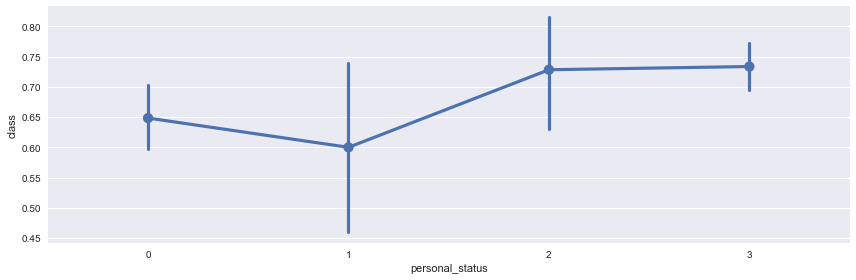

In [31]:
display_barplot(df, 'personal_status')

other_parties  class
0              0         18
               1         23
1              0         10
               1         42
2              0        272
               1        635
Name: own_telephone, dtype: int64


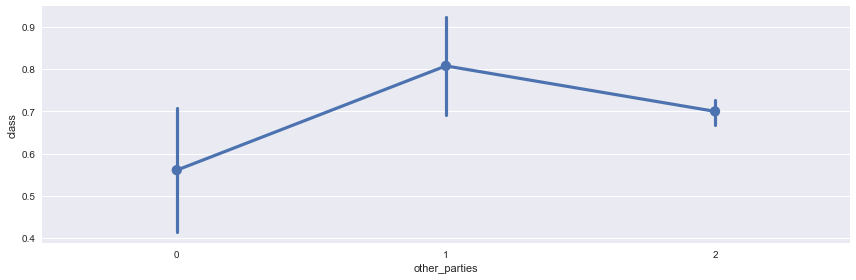

In [32]:
display_barplot(df, 'other_parties')

residence_since  class
0                0         36
                 1         94
1                0         97
                 1        211
2                0         43
                 1        106
3                0        124
                 1        289
Name: own_telephone, dtype: int64


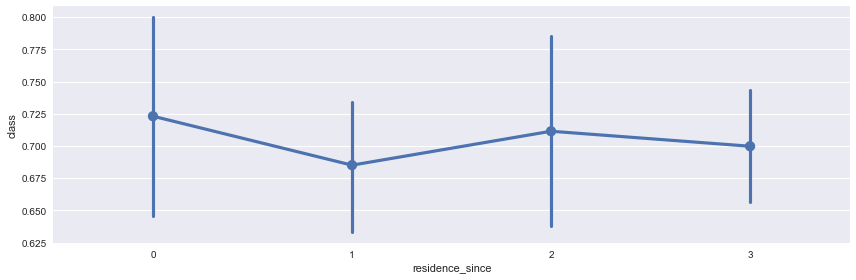

In [33]:
display_barplot(df, 'residence_since')

Drop 'residence_since'

property_magnitude  class
0                   0         71
                    1        161
1                   0         67
                    1         87
2                   0         60
                    1        222
3                   0        102
                    1        230
Name: own_telephone, dtype: int64


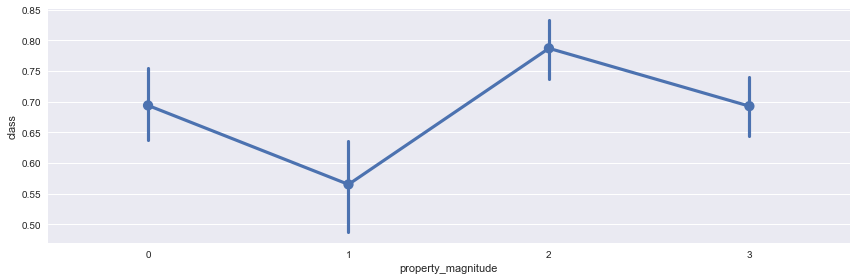

In [34]:
display_barplot(df, 'property_magnitude')

other_payment_plans  class
0                    0         57
                     1         82
1                    0        224
                     1        590
2                    0         19
                     1         28
Name: own_telephone, dtype: int64


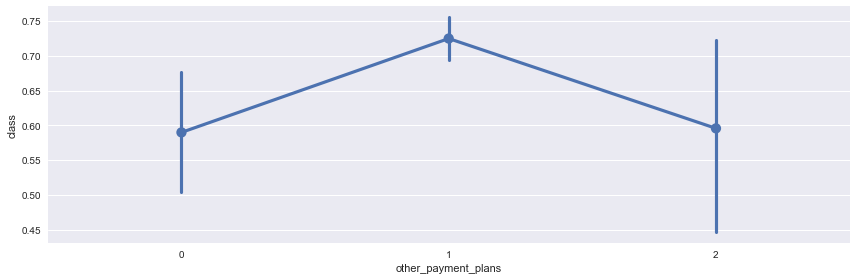

In [35]:
display_barplot(df, 'other_payment_plans')

housing  class
0        0         44
         1         64
1        0        186
         1        527
2        0         70
         1        109
Name: own_telephone, dtype: int64


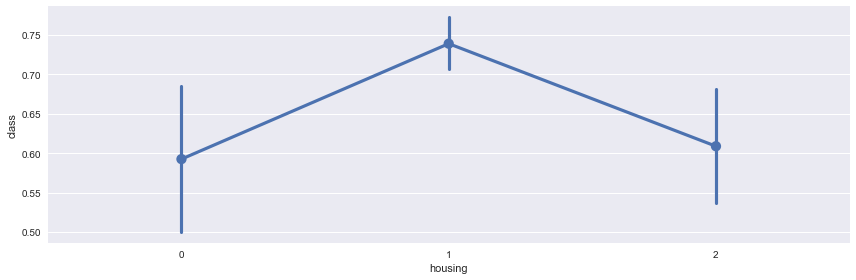

In [36]:
display_barplot(df, 'housing')

Set - Housing : Own : 1 or other : 0

existing_credits  class
1.0               0        200
                  1        433
2.0               0         92
                  1        241
3.0               0          6
                  1         22
4.0               0          2
                  1          4
Name: own_telephone, dtype: int64


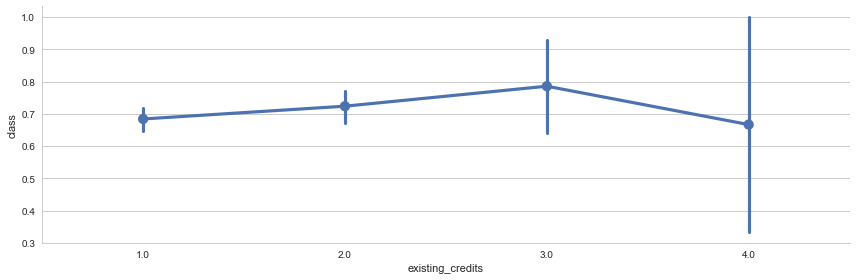

In [124]:
display_barplot(df, 'existing_credits')

job                             class
b"'high qualif/self emp/mgmt'"  0         51
                                1         97
b"'unemp/unskilled non res'"    0          7
                                1         15
b"'unskilled resident'"         0         56
                                1        144
b'skilled'                      0        186
                                1        444
Name: own_telephone, dtype: int64


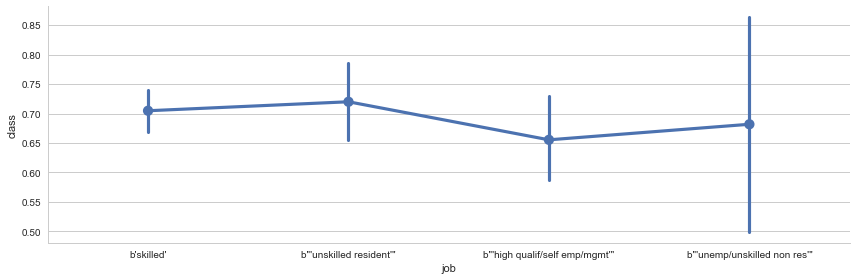

In [125]:
display_barplot(df, 'job')

Drop 'job' 

foreign_worker  class
0               0          4
                1         33
1               0        296
                1        667
Name: own_telephone, dtype: int64


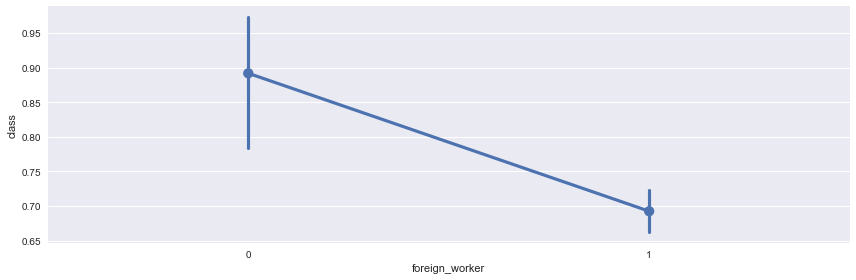

In [39]:
display_barplot(df, 'foreign_worker')

num_dependents  class
0               0        254
                1        591
1               0         46
                1        109
Name: own_telephone, dtype: int64


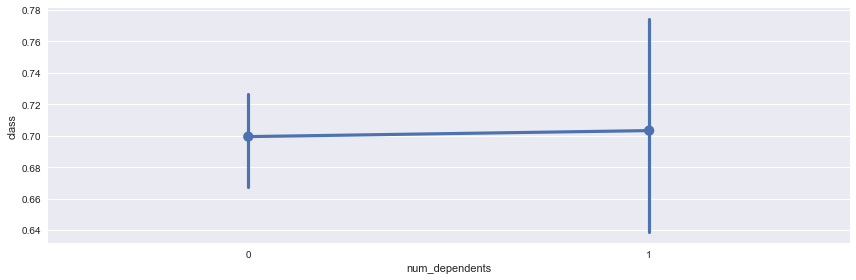

In [40]:
display_barplot(df, 'num_dependents')

Drop 'num_dependents'

In [4]:
df['class'].value_counts()

1    700
0    300
Name: class, dtype: int64

In [6]:
df.pivot_table(['age'], index=['class'] , aggfunc='mean')

,age
class,
0,33.963333
1,36.224286


In [7]:
df.pivot_table(['credit_amount'], index=['class'] , aggfunc='mean')

,credit_amount
class,
0,3938.126667
1,2985.457143


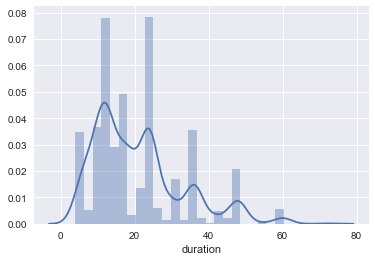

In [20]:
sns.distplot(df['duration'])

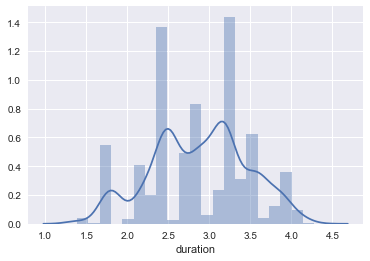

In [21]:
sns.distplot(np.log(df['duration']))

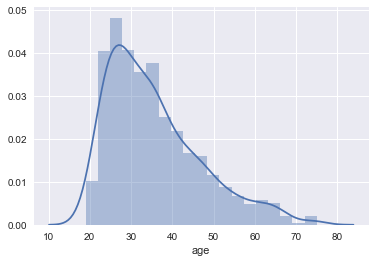

In [14]:
sns.distplot(df['age'])

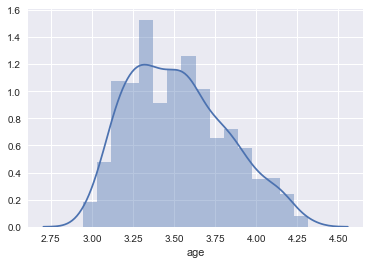

In [15]:
sns.distplot(np.log(df['age']))

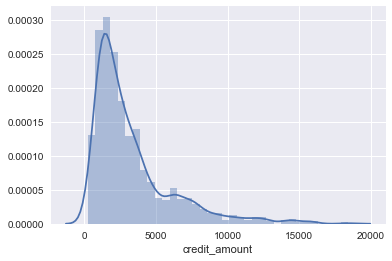

In [10]:
sns.distplot(df['credit_amount'])

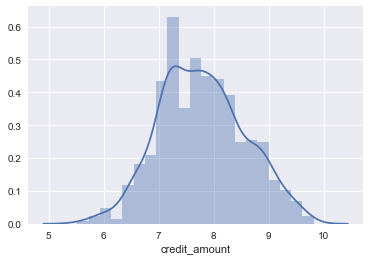

In [16]:
sns.distplot(np.log(df['credit_amount']))

# Target Class Base rate : 70% Accuracy
<br>
class : 1 70% <br>
It means that randomly selected data will have 70% of class 1 <br>
so I think model accuracy should have more than 70% <br>
<br>
<br>



<br>
# Feature Engineering Part <br>
<br>

In [134]:
df, col_names = load_german_data()

def feature_engineering(df):

    chg_dummy_col = []
    
    for col in df.columns :
        if df[col].dtypes == 'object' :
#            df[col] = df[col].astype('category')
#            df[col] = df[col].cat.codes
            chg_dummy_col.append(col)
            
    df['duration'] = np.log(df['duration'])
    df['credit_amount'] = np.log(df['credit_amount'])
    df['age'] = np.log(df['age'])
    
    df_dummy = pd.get_dummies(df[chg_dummy_col])
    df_dummy['duration'] = df['duration']
    df_dummy['credit_amount'] = df['credit_amount']
    df_dummy['age'] = df['age']
    df_dummy['class'] = df['class']
    
    print (df_dummy.shape)
    
    return df_dummy
    
df=feature_engineering(df)  
df.head()

(1000, 66)


,"checking_status_b""'0<=X<200'""","checking_status_b""'<0'""","checking_status_b""'>=200'""","checking_status_b""'no checking'""","credit_history_b""'all paid'""","credit_history_b""'critical/other existing credit'""","credit_history_b""'delayed previously'""","credit_history_b""'existing paid'""","credit_history_b""'no credits/all paid'""","purpose_b""'domestic appliance'""","purpose_b""'new car'""","purpose_b""'used car'""",purpose_b'business',purpose_b'education',purpose_b'furniture/equipment',purpose_b'other',purpose_b'radio/tv',purpose_b'repairs',purpose_b'retraining',"savings_status_b""'100<=X<500'""","savings_status_b""'500<=X<1000'""","savings_status_b""'<100'""","savings_status_b""'>=1000'""","savings_status_b""'no known savings'""","employment_b""'1<=X<4'""","employment_b""'4<=X<7'""","employment_b""'<1'""","employment_b""'>=7'""",employment_b'unemployed',installment_commitment_1.0,installment_commitment_2.0,installment_commitment_3.0,installment_commitment_4.0,"personal_status_b""'female div/dep/mar'""","personal_status_b""'male div/sep'""","personal_status_b""'male mar/wid'""","personal_status_b""'male single'""","other_parties_b""'co applicant'""",other_parties_b'guarantor',other_parties_b'none',residence_since_1.0,residence_since_2.0,residence_since_3.0,residence_since_4.0,"property_magnitude_b""'life insurance'""","property_magnitude_b""'no known property'""","property_magnitude_b""'real estate'""",property_magnitude_b'car',other_payment_plans_b'bank',other_payment_plans_b'none',other_payment_plans_b'stores',"housing_b""'for free'""",housing_b'own',housing_b'rent',existing_credits_1.0,existing_credits_2.0,existing_credits_3.0,existing_credits_4.0,"job_b""'high qualif/self emp/mgmt'""","job_b""'unemp/unskilled non res'""","job_b""'unskilled resident'""",job_b'skilled',duration,credit_amount,age,class
0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1.791759,7.063904,4.204693,1
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,3.871201,8.691315,3.091042,0
2,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,2.484907,7.647786,3.891820,1
3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,3.737670,8.972337,3.806662,1
4,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,3.178054,8.490849,3.970292,0


<br>
# Feature Selection Process
<br>
<br>


In [194]:
def feature_selection_method1(df, cutoff = 'zero', treshhold = 6):
    
    """
    Input Variable - 
        df - datasets
        cutoff - method of cutoff 
                ['mean' ,'median', 'mean_median', 'zero' ]
    """
    
    X = df.drop('class', axis=1)
    y = df['class']
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size = 0.2, random_state=RANDOM_SEED)
    
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train, y_train)
    
    features = pd.DataFrame()
    features['feature'] = X_train.columns
    features['importance'] = clf.feature_importances_
    features['mean'] = features['importance']>features['importance'].mean()
    features['median'] = features['importance']>features['importance'].median()
    
    features=features.sort(['importance'],ascending=False)

    
    if cutoff == 'mean_median':
        selected_feature_list = \
                list(features[(features['mean'])|(features['median'])]['feature'])
    elif cutoff == 'mean':
        selected_feature_list = \
                list(features[(features['mean'])]['feature'])
    elif cutoff == 'median':
        selected_feature_list = \
                list(features[(features['median'])]['feature'])
    elif cutoff == 'zero':
        selected_feature_list = \
                list(features[(features['importance']>0)]['feature'])
    
#    print (selected_feature_list)
    
    
#    print ("Old feature # : "+str(X.shape[1]))
    X = X[selected_feature_list[:treshhold]]
    
#    print ("New feature # : "+str(X.shape[1]))
    
    return X, y

X, y = feature_selection_method1(df, 'mean_median')

In [182]:
X.head()

,"checking_status_b""'no checking'""",credit_amount,age,duration,"personal_status_b""'female div/dep/mar'""","savings_status_b""'<100'"""
0,0,7.063904,4.204693,1.791759,0,0
1,0,8.691315,3.091042,3.871201,1,1
2,1,7.647786,3.891820,2.484907,0,1
3,0,8.972337,3.806662,3.737670,0,1
4,0,8.490849,3.970292,3.178054,0,1


In [191]:
def test_logreg(X,y):
    clf = LogisticRegression()
    
    
    cross_score = []
    
    for tr in range(1,65):
        X, y = feature_selection_method1(df, 'mean_median', treshhold = tr)
        X_train, X_test, y_train, y_test = train_test_split(X,y, \
                                        stratify=y, test_size = 0.2, random_state=RANDOM_SEED)
        cross = cross_val_score(clf, \
                        X_train, y = y_train, scoring = "accuracy", cv = 5, n_jobs=4)
        cross_score.append(np.mean(cross))
#        print ("Score : "+str(np.mean(cross)))
        
    feature_num = pd.DataFrame()
    feature_num['num'] = range(1,65)
    feature_num['score'] = cross_score
    
    X, y = feature_selection_method1(df, 'mean_median', treshhold = 19)
    X_train, X_test, y_train, y_test = train_test_split(X,y, \
                                        stratify=y, test_size = 0.2, random_state=RANDOM_SEED)
    
    clf.fit(X_train, y_train)
    print ("Train Score : "+str(clf.score(X_train, y_train)))
    print ("Test Score : "+str(clf.score(X_test, y_test)))
    
    return feature_num
#    print (cross.score(X_test, y_test))
    
    
feature_num = test_logreg(X,y)  
feature_num
    

Old feature # : 65
New feature # : 1
Old feature # : 65
New feature # : 2
Old feature # : 65
New feature # : 3
Old feature # : 65
New feature # : 4
Old feature # : 65
New feature # : 5
Old feature # : 65
New feature # : 6
Old feature # : 65
New feature # : 7
Old feature # : 65
New feature # : 8
Old feature # : 65
New feature # : 9
Old feature # : 65
New feature # : 10
Old feature # : 65
New feature # : 11
Old feature # : 65
New feature # : 12
Old feature # : 65
New feature # : 13
Old feature # : 65
New feature # : 14
Old feature # : 65
New feature # : 15
Old feature # : 65
New feature # : 16
Old feature # : 65
New feature # : 17
Old feature # : 65
New feature # : 18
Old feature # : 65
New feature # : 19
Old feature # : 65
New feature # : 20
Old feature # : 65
New feature # : 21
Old feature # : 65
New feature # : 22
Old feature # : 65
New feature # : 23
Old feature # : 65
New feature # : 24
Old feature # : 65
New feature # : 25
Old feature # : 65
New feature # : 26
Old feature # : 65
Ne

,num,score
0,1,0.70000
1,2,0.70250
2,3,0.71000
3,4,0.72875
4,5,0.73000
5,6,0.73125
6,7,0.72875
7,8,0.75125
8,9,0.74875
9,10,0.75250


Old feature # :  65
New feature # :  13


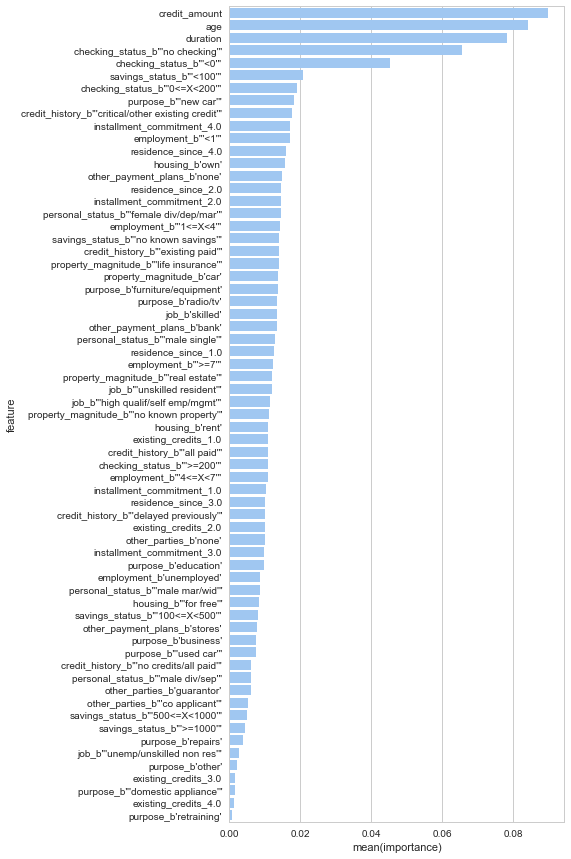

In [171]:
def feature_selection_method2(df, cutoff = 'mean', print_graph = 'False'):
    
    X = df.drop('class', axis=1)
    y = df['class']
    
#    print (X.iloc[0], y[0])
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, \
                                          test_size = 0.2, random_state=RANDOM_SEED)
    
    clf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)
    clf = clf.fit(X_train, y_train)
    features = pd.DataFrame()
    features['feature'] = X_train.columns
    features['importance'] = clf.feature_importances_

    features=features.sort(['importance'],ascending=False)
    
#    print (features.sort(['importance'],ascending=False))
    
    selec_model = SelectFromModel(clf, threshold=cutoff, prefit=True)
    X_train_selected = selec_model.transform(X_train)
    print ("Old feature # : ", X_train.shape[1])
    print ("New feature # : ", X_train_selected.shape[1])
    
    X_test_selected = selec_model.transform(X_test)
    
    sns.set(style="whitegrid")

    # Initialize the matplotlib figure
    if print_graph == 'True':
        f, ax = plt.subplots(figsize=(6, 15))

        sns.set_color_codes("pastel")
        sns.barplot(x="importance", y="feature", data=features,
                label="Total", color="b")
    
    return X_train_selected, X_test_selected, y_train, y_test
    
X_train, X_test, y_train, y_test = feature_selection_method2(df, cutoff='mean',print_graph = 'True')


<br>
# Model Selection 
<br>
<br>


In [203]:

def model_selection(df):
    
    kfold = StratifiedKFold(n_splits=5)
    
    #X_train, X_test, y_train, y_test = feature_selection_method2(df, cutoff='mean')
    
    X, y = feature_selection_method1(df, 'mean_median', treshhold = 20)
    X_train, X_test, y_train, y_test = train_test_split(X,y, \
                            stratify=y, test_size = 0.2, random_state=RANDOM_SEED)
    
    classifiers = []
    classifiers.append(SVC(random_state=RANDOM_SEED))
    classifiers.append(DecisionTreeClassifier(random_state=RANDOM_SEED))
    classifiers.append(RandomForestClassifier(random_state=RANDOM_SEED))
    classifiers.append(GradientBoostingClassifier(random_state=RANDOM_SEED))
    classifiers.append(MLPClassifier(random_state=RANDOM_SEED))
    classifiers.append(KNeighborsClassifier())
    classifiers.append(LogisticRegression())
    
    cv_results = []
    for classifier in classifiers :
        cv_results.append(cross_val_score(classifier, \
                        X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))
        
    cv_means = []
    cv_std = []
    for cv_result in cv_results:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    cv_res = \
             pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossVal_STD": cv_std,\
                   "Algorithm":["SVC","DecisionTree", "RandomForest","GradientBoosting", \
                                "MultipleLayer","KNeighboors","LogisticRegression"]})
    return cv_res

rtn = model_selection(df)   
rtn

,Algorithm,CrossVal_STD,CrossVal_Score_Means
0,SVC,0.012870,0.75250
1,DecisionTree,0.032596,0.68750
2,RandomForest,0.031474,0.72625
3,GradientBoosting,0.016583,0.73500
4,MultipleLayer,0.032930,0.77000
5,KNeighboors,0.036785,0.72750
6,LogisticRegression,0.031623,0.77500


In [211]:
def multilayer(X_train, X_test, y_train, y_test):
    clf = MLPClassifier(solver='lbfgs')
    kfold = StratifiedKFold(n_splits=5)
    
    parameter_grid = {
                 'hidden_layer_sizes' : [[20],[30],[50],[10,10], [20,10], [30,20,10]],
                 "alpha" : [0.0001,0.001],
                 'activation': ['relu']
                 }
    
    grid = GridSearchCV(clf, parameter_grid, \
                       cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1 )
    
    grid.fit(X_train, y_train)
    
    print (grid.best_params_)
    print (grid.best_score_)
    print (grid.score(X_test, y_test))
    
    return grid

X_train, X_test, y_train, y_test = feature_selection_method2(df, cutoff='mean')    
grid = multilayer(X_train, X_test, y_train, y_test)

Old feature # :  65
New feature # :  13
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    4.2s finished


{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': [20]}
0.77
0.685


Old feature # :  65
New feature # :  13
Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   27.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:  1.5min finished


{'criterion': 'gini', 'max_depth': 8, 'max_features': 1, 'n_estimators': 300}
0.76125
0.72


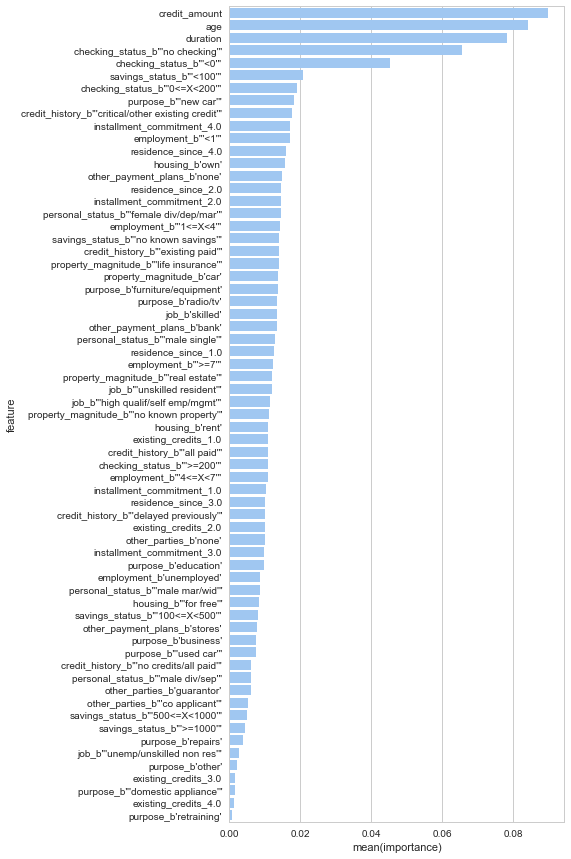

In [167]:
def randomforest_classificatiion(X_train, X_test, y_train, y_test):
    
    clf = RandomForestClassifier(max_features='sqrt')
    kfold = StratifiedKFold(n_splits=5)
    
    parameter_grid = {
                 'max_depth' : [5,6,7,8],
                 "max_features": [1, 3, 10],
                 'n_estimators': [100,200,300,400,500],
                 'criterion': ['gini','entropy']
                 }
    
    grid = GridSearchCV(clf, parameter_grid, \
                       cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1 )
    
    grid.fit(X_train, y_train)
    
    print (grid.best_params_)
    print (grid.best_score_)
    print (grid.score(X_test, y_test))
    
    return grid

    #cross_validation = StratifiedKFold(targets, n_folds=5)

X_train, X_test, y_train, y_test = feature_selection_method2(df, cutoff='mean')    
grid = randomforest_classificatiion(X_train, X_test, y_train, y_test)

In [174]:
def gradientboosting_classificatiion(X_train, X_test, y_train, y_test):
    
    clf = GradientBoostingClassifier()
    kfold = StratifiedKFold(n_splits=5)

    parameter_grid = {
                 'max_depth' : [3,4, 5,6,7], 
                 'learning_rate' : [0.001, 0.01, 0.1, 1],
                 'n_estimators': [240,250,300,400,500]
                 }
    
    grid = GridSearchCV(clf, parameter_grid, \
                       cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1 )
    
    grid.fit(X_train, y_train)
    
    print (grid.best_params_)
    print (grid.best_score_)
    print (grid.score(X_test, y_test))
    
    return grid

    #cross_validation = StratifiedKFold(targets, n_folds=5)

X_train, X_test, y_train, y_test = feature_selection_method2(df, cutoff='mean') 
grid = gradientboosting_classificatiion(X_train, X_test, y_train, y_test)

Old feature # :  65
New feature # :  13
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   29.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:  1.2min finished


{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 250}
0.755
0.71
